In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from prophet import Prophet
import matplotlib.pyplot as plt
import datetime

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [13]:
# df = pd.read_csv('./Project 2/DataFolder/rawDataBitcoin.csv')
df= pd.read_csv('../data/BitCoin.csv')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') 
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp())
df = df.sort_values(by='Date')

In [16]:
print(df.head())

      Unnamed: 0          Date    Open    High     Low   Close       Volume  \
1605        1605  1.357337e+09  139.00  139.89  107.72  116.99  8026718.801   
1574        1574  1.357423e+09  128.81  129.78  127.20  129.30  7521959.816   
1544        1544  1.357510e+09   97.51   97.66   86.30   88.05  5759985.732   
1513        1513  1.357596e+09  106.21  108.00  103.01  104.00  6348194.873   
1482        1482  1.357682e+09  135.14  145.81  134.81  138.34  8179728.096   

      Market Cap  
1605  1542820000  
1574  1445800000  
1544  1107130000  
1513  1220190000  
1482  1572230000  


In [18]:
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

for column in columns:
        df[column] = df[column].interpolate(method='linear', limit_direction='both')

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1609   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: │  0 │    0 │      800 │      460 │        0 │      400 │      800 │     1200 │     1600 │ ▇▇▇▇▇▇ │  │
│ │ 0        │    │      │          │          │          │          │          │          │          │        │  │
│ │ Date     │  0 │    0 │ 14000000 │ 41000000 │ 14000000 │ 14000000 │ 14000000 │ 15000000 │ 15000000 │ ▅▇▇▇▇▆ │  │
│ │          │    │      │       00 │          │       00 │       00 │       00 │       00 │       00 │        │  │
│ │ Open     │  0 │    0 │      690 │      800 │       68 │      260 │      450 │      700 │     4900 │   ▇▁   │  │
│ │ High     │  0 │    0 │      710 │      830 │       75 │      270 │      450 │      710 │     5000 │   ▇▁   │  │
│ │ Low      │  0 │    0 │      670 │      770 │       66 │      250 │      440 │      670 │     4700 │   ▇▁   │  │
│ │ Close    │  0 │    0 │      700 │      800 │       68 │      260 │      450 │      700 │     4900 │   ▇▁   │  │
│ │ Volume   │  0 │    0 │ 19000000 │ 47000000 │  2900000 │ 17000000 │ 39000000 │ 85000000 │ 41000000 │   ▇    │  │
│ │          │    │      │        0 │        0 │          │          │          │          │       00 │        │  │
│ │ Market   │  0 │    0 │ 78000000 │ 13000000 │ -2100000 │ -9600000 │ -1100000 │ 13000000 │ 21000000 │ ▅▇▆▃▇▇ │  │
│ │ Cap      │    │      │          │       00 │      000 │       00 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [19]:
 #Split the data into training and test sets
train_size = int(len(df) * 0.8)  # 80% training, 20% test
train_data = df[:train_size]
test_data = df[train_size:]

In [20]:
# Prepare the training data for Prophet
prophet_train_data = train_data[['Date', 'Close']]
prophet_train_data.columns = ['ds', 'y']

In [32]:
# Initialize the model
model = Prophet()

In [33]:
# Fit the model
model.fit(prophet_train_data)

16:50:19 - cmdstanpy - INFO - Chain [1] start processing


16:50:19 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Make a future dataframe for the test data
future = model.make_future_dataframe(periods=len(test_data))

In [24]:
# Forecast the future values
forecast = model.predict(future)

c:\Users\ricdw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\ricdw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


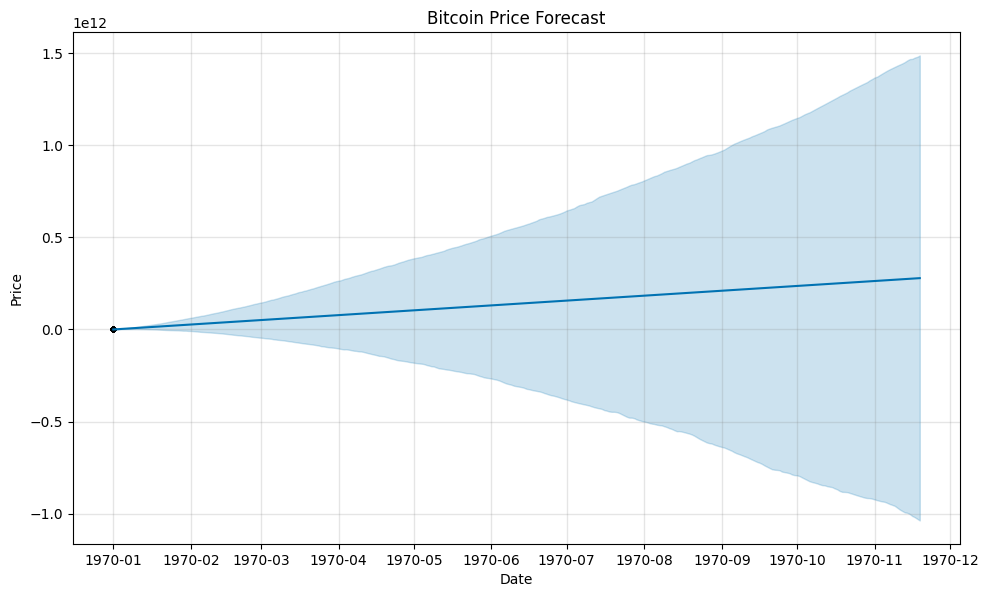

In [25]:
# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Price')
plt.title('Bitcoin Price Forecast')
plt.show()